#### data-science-process : https://www.wintellect.com/data-science-data-science-process/

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

In [4]:
df_train = pd.read_csv('datasources/jigsaw1/train.csv')
df_test = pd.read_csv('datasources/jigsaw1/test.csv')

In [6]:
df_train.shape

(159571, 8)

In [7]:
df_train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [8]:
df_test.shape

(153164, 2)

In [9]:
df_test.columns

Index(['id', 'comment_text'], dtype='object')

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [11]:
df_train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [12]:
df_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df_train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

#### Longeur des commentaires

In [14]:
df_train['comment_text'].str.len().describe()

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: comment_text, dtype: float64

#### Exemples de commentaires : Données non structurées, espace, ponctuation, dates, retour à la ligne ...

In [15]:
df_train['comment_text'][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [18]:
df_train['comment_text'][159570]

'"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of community goes ""you have bad ideas"" go away, instead of helping rewrite them.   "'

In [16]:
df_train['comment_text'][7]

"Your vandalism to the Matt Shirvington article has been reverted.  Please don't do it again, or you will be banned."

In [17]:
df_train['comment_text'][11]

'bbq \n\nbe a man and lets discuss it-maybe over the phone?'

In [19]:
df_train[df_train.toxic == 1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [20]:
len(df_train[df_train.severe_toxic == 1])

1595

In [21]:
df_train['non_toxic'] = ((df_train.iloc[:,2:].sum(axis=1)) == 0).astype(int)

In [22]:
all_cat = df_train.iloc[:,2:].sum()
all_cat

toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
non_toxic        143346
dtype: int64

In [23]:
all_cat.values

array([ 15294,   1595,   8449,    478,   7877,   1405, 143346])

In [24]:
df_train.shape

(159571, 9)

In [25]:
df_train.shape[0] == sum(all_cat.values)

False

#### Les catégories ne sont pas mutuellement exclusive : nous avons des commentaires multi-labelisés : https://scikit-learn.org/stable/modules/multiclass.html

In [26]:
index_cat = all_cat.index.values
index_cat

array(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate', 'non_toxic'], dtype=object)

In [27]:
categories = index_cat.tolist()

#### Commentaires multi-labelisés

In [47]:
df_multilabel = df_train.groupby(\
                                categories)\
                                .size()\
                                .sort_values(ascending=False)\
                                .reset_index()\
                                .rename(columns={0: 'count'})
df_multilabel.sample(5)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic,count
16,1,1,1,1,1,0,0,64
14,1,0,1,1,1,0,0,131
31,1,1,1,0,0,1,0,6
24,0,0,1,0,1,1,0,18
28,1,0,1,1,0,0,0,11


In [32]:
df_2cat = pd.DataFrame({'categorie':['non_toxic', 'toxic'], 'count':[143346, 16225]} )
df_2cat.head()

,categorie,count
0,non_toxic,143346
1,toxic,16225


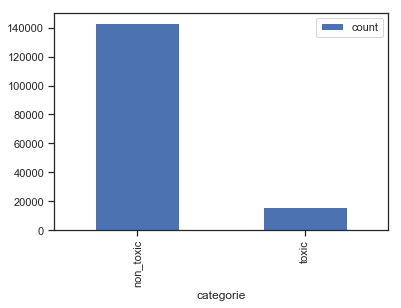

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

ax = df_2cat.plot.bar(x='categorie', y='count')

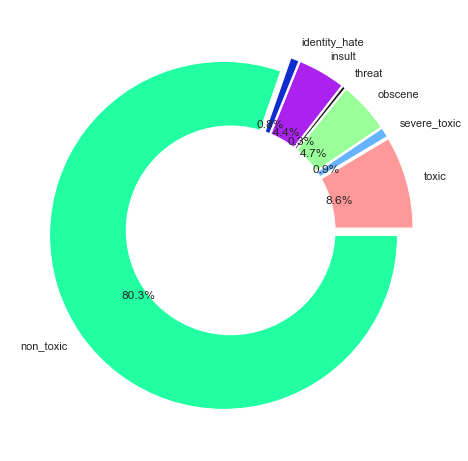

In [34]:
fig1, ax = plt.subplots(figsize = (8, 8))
colors = ['#ff9999','#66b3ff','#99ff99','#111111', '#ab22EE','#112CCC', '#22ffa3']
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
ax.pie(all_cat.values, labels=all_cat.index, autopct='%1.1f%%', colors=colors, explode=explode)
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

#### La présence des différentes catégories est déséquilibrée ==> Il faut faire attention quand applique ici des modèles de ML
#### https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

In [35]:
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from collections import Counter
import re
import string
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sghenimi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:

categories = all_cat.index.values
word_counter = {}

def clean_comment(text):
    text = re.sub('[{}]'.format(string.punctuation), ' ', text.lower())
    return ' '.join([word for word in text.split() if word not in (stop)])

for categ in categories:
    d = Counter()
    df_train[df_train[categ] == 1]['comment_text'].apply(lambda t: d.update(clean_comment(t).split()))
    word_counter[categ] = pd.DataFrame.from_dict(d, orient='index')\
                                        .rename(columns={0: 'count'})\
                                        .sort_values('count', ascending=False)

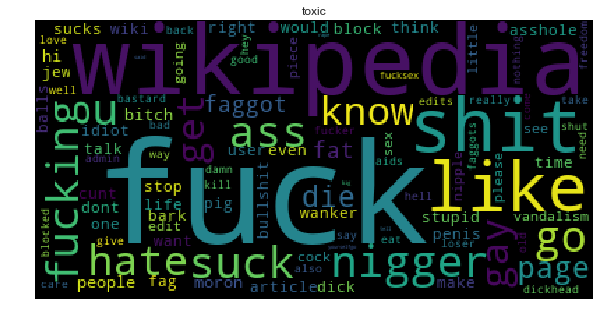

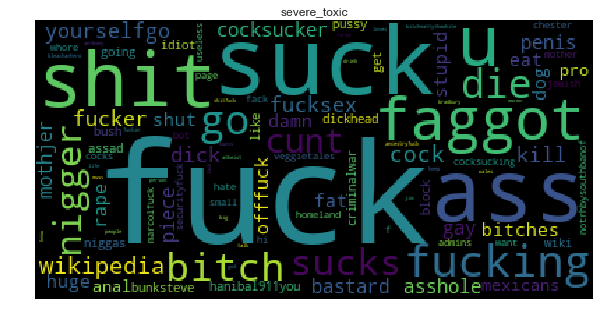

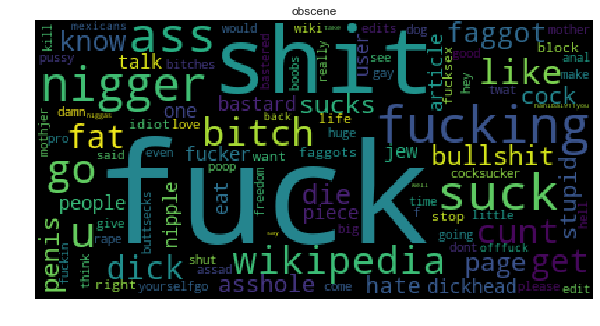

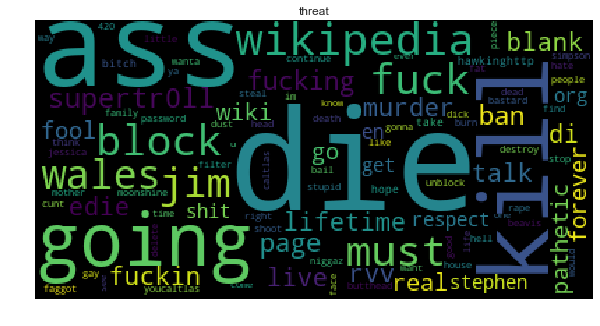

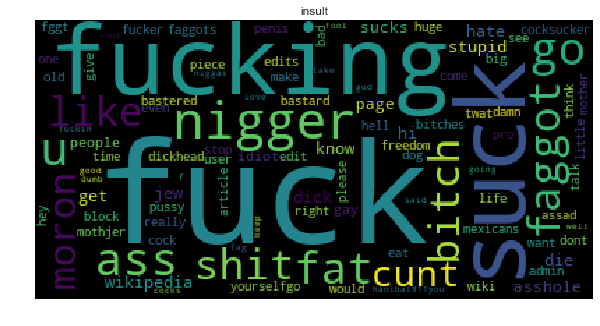

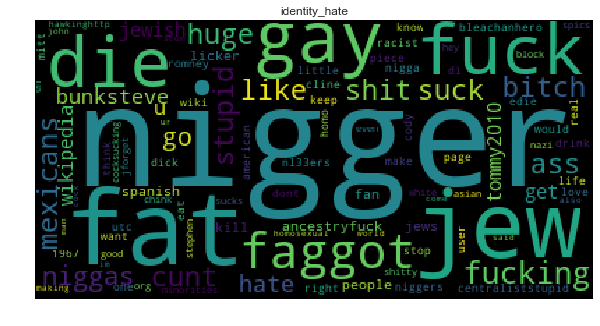

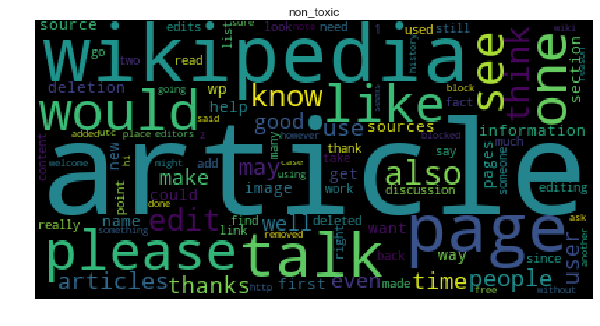

In [37]:
for w in word_counter:
    wc = word_counter[w]

    wordcloud = WordCloud(
          max_words=100,
          max_font_size=100, 
          random_state=5000
         ).generate_from_frequencies(wc.to_dict()['count'])

    fig = plt.figure(figsize=(10, 6))
    plt.title(w)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

In [ ]:
def clean_data(comment):
    """
    This function receives comments and returns clean word-list
    """
    #Convert to lower case , so that Hi and hi are the same
    comment=comment.lower()
    #remove \n
    comment=re.sub("\\n","",comment)
    # remove leaky elements like ip,user
    comment=re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}","",comment)
    #removing usernames
    comment=re.sub("\[\[.*\]","",comment)
    
    #Split the sentences into words
    words=tokenizer.tokenize(comment)
    
    # (')aphostophe  replacement (ie)   you're --> you are  
    # ( basic dictionary lookup : master dictionary present in a hidden block of code)
    words=[APPO[word] if word in APPO else word for word in words]
    words=[lem.lemmatize(word, "v") for word in words]
    words = [w for w in words if not w in eng_stopwords]
    
    clean_sent=" ".join(words)
    # remove any non alphanum,digit character
    #clean_sent=re.sub("\W+"," ",clean_sent)
    #clean_sent=re.sub("  "," ",clean_sent)
    return(clean_sent)